In [1]:
import sqlite3
import numpy as np
import pandas as pd
conn = sqlite3.connect('pokemon.db')
print("Opened database successfully")

Opened database successfully


In [2]:
def get_data(cursor):
  all_rows = cursor.fetchall()
  #[all_rows.append(np.array(row)) for row in cursor]
  column_names = [description[0] for description in cursor.description]
  df = pd.DataFrame(data=all_rows, columns = column_names)  
  # ซ่อน index
  blankIndex=[''] * len(df)
  df.index=blankIndex
  return df

In [24]:

with conn:
  conn.execute("DROP table IF EXISTS all_pokemon")

print("Table dropped successfully")

Table dropped successfully


In [23]:


with conn:
  cursor = conn.execute("DROP VIEW POKEMON_MAX")


print("Operation done successfully")

Operation done successfully


In [3]:

with conn:
  conn.execute('''CREATE TABLE catch_pokemon
         (ID INTEGER PRIMARY KEY AUTOINCREMENT,
         KIND      TEXT    NOT NULL,
         FOUND_NO   INT     NOT NULL,
         CAUGHT_NO  INT     NOT NULL)''')

 
print("Table created successfully")

Table created successfully


In [4]:


with conn:
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Pikasu', 10,7 )")
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Carpeter', 15,8 )")
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Beedle', 32,24 )")
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Poppo', 17,9 )")
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Koratta', 16,12 )")
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Onitsumi', 20,14 )")
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Arbo', 28,17 )")
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Konpang', 12,5 )")
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Neauroma', 5,4 )")
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Tamatama', 18,8 )")
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Kokoon', 8,5 )")
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Pigeon', 26,17 )")
  conn.execute("INSERT INTO catch_pokemon (KIND,FOUND_NO,CAUGHT_NO) VALUES ('Camel', 17,12 )")

  #conn.commit()

print("Records created successfully")

Records created successfully


In [7]:


#cursor = conn.execute("SELECT id, name, age, salary from COMPANY")
cursor = conn.execute("SELECT * from catch_pokemon")
#Select query field of table
df = get_data(cursor)


print("Operation done successfully")
df

Operation done successfully


,ID,KIND,FOUND_NO,CAUGHT_NO
,1,Pikasu,10,7
,2,Carpeter,15,8
,3,Beedle,32,24
,4,Poppo,17,9
,5,Koratta,16,12
,6,Onitsumi,20,14
,7,Arbo,28,17
,8,Konpang,12,5
,9,Neauroma,5,4
,10,Tamatama,18,8


In [5]:


with conn:
  conn.execute('''CREATE TABLE find_pokemon
         (ID INTEGER PRIMARY KEY AUTOINCREMENT,
         kind     TEXT    NOT NULL,
         school    INT     NOT NULL,
         playground INT     NOT NULL,
         shopping_mall  INT NOT NULL)''')


print("Table created successfully")

Table created successfully


In [6]:


with conn:
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Pikasu', 5,7,5 )")
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Carpeter', 8,5,10 )")
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Beedle', 18,13,25 )")
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Poppo', 10,7,9 )")
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Koratta', 12,8,10 )")
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Onitsumi', 11,9,14 )")
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Arbo', 15,22,8 )")
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Konpang', 7,6,6 )")
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Neauroma', 3,2,4 )")
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Tamatama', 6,10,10 )")
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Kokoon', 4,9,3 )")
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Pigeon', 16,15,12 )")
  conn.execute("INSERT INTO find_pokemon (kind,school,playground,shopping_mall) VALUES ('Camel', 8,11,10 )")

  #conn.commit()

print("Records created successfully")

Records created successfully


In [8]:

cursor = conn.execute("SELECT * from find_pokemon")
df = get_data(cursor)


print("Operation done successfully")
df

Operation done successfully


,ID,kind,school,playground,shopping_mall
,1,Pikasu,5,7,5
,2,Carpeter,8,5,10
,3,Beedle,18,13,25
,4,Poppo,10,7,9
,5,Koratta,12,8,10
,6,Onitsumi,11,9,14
,7,Arbo,15,22,8
,8,Konpang,7,6,6
,9,Neauroma,3,2,4
,10,Tamatama,6,10,10


# a)

In [9]:

cursor = conn.execute("SELECT KIND,FOUND_NO+CAUGHT_NO from catch_pokemon")
df = get_data(cursor)


print("Operation done successfully")
df

Operation done successfully


,KIND,FOUND_NO+CAUGHT_NO
,Pikasu,17
,Carpeter,23
,Beedle,56
,Poppo,26
,Koratta,28
,Onitsumi,34
,Arbo,45
,Konpang,17
,Neauroma,9
,Tamatama,26


# b)

In [10]:

cursor = conn.execute("SELECT KIND,FOUND_NO,CAUGHT_NO,(((CAUGHT_NO+0.0)/(FOUND_NO+0.0))*100.0) as performance from catch_pokemon")
df = get_data(cursor)


print("Operation done successfully")
df

Operation done successfully


,KIND,FOUND_NO,CAUGHT_NO,performance
,Pikasu,10,7,70.000000
,Carpeter,15,8,53.333333
,Beedle,32,24,75.000000
,Poppo,17,9,52.941176
,Koratta,16,12,75.000000
,Onitsumi,20,14,70.000000
,Arbo,28,17,60.714286
,Konpang,12,5,41.666667
,Neauroma,5,4,80.000000
,Tamatama,18,8,44.444444


# c)

In [11]:


#cursor = conn.execute("SELECT id, name, age, salary from COMPANY")
cursor = conn.execute("SELECT * from catch_pokemon ORDER BY KIND")
#Select query field of table
df = get_data(cursor)


print("Operation done successfully")
df

Operation done successfully


,ID,KIND,FOUND_NO,CAUGHT_NO
,7,Arbo,28,17
,3,Beedle,32,24
,13,Camel,17,12
,2,Carpeter,15,8
,11,Kokoon,8,5
,8,Konpang,12,5
,5,Koratta,16,12
,9,Neauroma,5,4
,6,Onitsumi,20,14
,12,Pigeon,26,17


# d)

In [12]:

cursor = conn.execute("SELECT * from catch_pokemon ORDER BY FOUND_NO desc,CAUGHT_NO asc")
df = get_data(cursor)

print("Operation done successfully")
df

Operation done successfully


,ID,KIND,FOUND_NO,CAUGHT_NO
,3,Beedle,32,24
,7,Arbo,28,17
,12,Pigeon,26,17
,6,Onitsumi,20,14
,10,Tamatama,18,8
,4,Poppo,17,9
,13,Camel,17,12
,5,Koratta,16,12
,2,Carpeter,15,8
,8,Konpang,12,5


# e)

In [13]:

cursor = conn.execute("SELECT KIND,FOUND_NO,CAUGHT_NO,(((CAUGHT_NO+0.0)/(FOUND_NO+0.0))*100.0) as performance from catch_pokemon WHERE performance >= 65")
df = get_data(cursor)


print("Operation done successfully")
df

Operation done successfully


,KIND,FOUND_NO,CAUGHT_NO,performance
,Pikasu,10,7,70.000000
,Beedle,32,24,75.000000
,Koratta,16,12,75.000000
,Onitsumi,20,14,70.000000
,Neauroma,5,4,80.000000
,Pigeon,26,17,65.384615
,Camel,17,12,70.588235


# f)

In [14]:

cursor1 = conn.execute("SELECT KIND,MAX(((CAUGHT_NO+0.0)/(FOUND_NO+0.0))*100.0) as performance from catch_pokemon UNION SELECT KIND,MIN(((CAUGHT_NO+0.0)/(FOUND_NO+0.0))*100.0) as performance from catch_pokemon \
ORDER BY performance desc")
df = get_data(cursor1)


print("Operation done successfully")
df

Operation done successfully


,KIND,performance
,Neauroma,80.000000
,Konpang,41.666667


# g)

In [15]:

cursor1 = conn.execute("SELECT kind,(school+playground+shopping_mall) as sum_found from find_pokemon ORDER BY sum_found desc")
df = get_data(cursor1)


print("Operation done successfully")
df

Operation done successfully


,kind,sum_found
,Beedle,56
,Arbo,45
,Pigeon,43
,Onitsumi,34
,Koratta,30
,Camel,29
,Poppo,26
,Tamatama,26
,Carpeter,23
,Konpang,19


# h)

In [16]:
with conn:
  conn.execute('''CREATE VIEW IF NOT EXISTS POKEMON_VIEW AS
                SELECT c.KIND
                FROM catch_pokemon as c,find_pokemon as f WHERE c.KIND == f.kind AND (c.FOUND_NO+CAUGHT_NO) != (f.school+f.playground+f.shopping_mall);''')

print("View created successfully")

View created successfully


In [17]:
with conn:
  conn.execute('''DELETE FROM catch_pokemon WHERE catch_pokemon.kind IN (SELECT KIND FROM POKEMON_VIEW)''')

cursor = conn.execute('''SELECT * FROM catch_pokemon''')
print("Operation done successfully")
df = get_data(cursor)

df

Operation done successfully


,ID,KIND,FOUND_NO,CAUGHT_NO
,1,Pikasu,10,7
,2,Carpeter,15,8
,3,Beedle,32,24
,4,Poppo,17,9
,6,Onitsumi,20,14
,7,Arbo,28,17
,9,Neauroma,5,4
,10,Tamatama,18,8
,12,Pigeon,26,17
,13,Camel,17,12


In [18]:
with conn:
  conn.execute("DELETE FROM find_pokemon WHERE find_pokemon.kind  NOT IN (SELECT KIND FROM catch_pokemon)")
cursor = conn.execute("SELECT * FROM find_pokemon")
print("Operation done successfully")
df = get_data(cursor)

df

Operation done successfully


,ID,kind,school,playground,shopping_mall
,1,Pikasu,5,7,5
,2,Carpeter,8,5,10
,3,Beedle,18,13,25
,4,Poppo,10,7,9
,6,Onitsumi,11,9,14
,7,Arbo,15,22,8
,9,Neauroma,3,2,4
,10,Tamatama,6,10,10
,12,Pigeon,16,15,12
,13,Camel,8,11,10


# i)

In [ ]:
with conn:
  conn.execute('''CREATE TABLE all_pokemon
         (ID INTEGER PRIMARY KEY AUTOINCREMENT,
         kind     TEXT    NOT NULL,
         sum_all    INT     NOT NULL)''')
cursor = conn.execute("SELECT kind, school+playground+shopping_mall FROM find_pokemon")
records = cursor.fetchall()

for i in records:
  conn.execute("INSERT INTO all_pokemon (kind,sum_all) VALUES "+str(i))


In [20]:
cursor = conn.execute("SELECT * FROM all_pokemon")
df = get_data(cursor)
df

,ID,kind,sum_all
,1,Pikasu,17
,2,Carpeter,23
,3,Beedle,56
,4,Poppo,26
,5,Onitsumi,34
,6,Arbo,45
,7,Neauroma,9
,8,Tamatama,26
,9,Pigeon,43
,10,Camel,29


# j)

In [22]:

with conn:
  conn.execute('''CREATE VIEW IF NOT EXISTS POKEMON_MAX AS
                 SELECT kind,MAX(playground) as count FROM find_pokemon UNION SELECT kind,MAX(school) FROM find_pokemon UNION SELECT kind,MAX(shopping_mall) FROM find_pokemon''')
cursor = conn.execute("SELECT * FROM POKEMON_MAX")


In [23]:
place = ("Playground","School" , "Shopping Mall")
cursor = conn.execute("SELECT * FROM POKEMON_MAX")
records = cursor.fetchall()
most_pokemon = pd.DataFrame(records,columns=("Kind", "Count"))
most_pokemon.insert(0,"Place",place)
most_pokemon.index = [""]*len(most_pokemon)
most_pokemon

,Place,Kind,Count
,Playground,Arbo,22
,School,Beedle,18
,Shopping Mall,Beedle,25


# k)

In [24]:
with conn:
    cursor = conn.execute('''SELECT school,playground,shopping_mall FROM find_pokemon''')

place = ["School","Playground","Shopping Mall"]
records = cursor.fetchall()
p = []
for i in range(len(records)):
    p.append(place[records[i].index(max(records[i]))])
with conn:
    cursor2 = conn.execute('''SELECT kind FROM find_pokemon''')
records2 = cursor2.fetchall()
m = pd.DataFrame(records2,index = [""]*len(p),columns=(["Pokemon"]))
m.insert(1,"Most Found Place",p)
m


,Pokemon,Most Found Place
,Pikasu,Playground
,Carpeter,Shopping Mall
,Beedle,Shopping Mall
,Poppo,School
,Onitsumi,Shopping Mall
,Arbo,Playground
,Neauroma,Shopping Mall
,Tamatama,Playground
,Pigeon,School
,Camel,Playground


# l)

In [25]:
with conn:
    cursor = conn.execute('''SELECT KIND,MAX(CAUGHT_NO) FROM catch_pokemon''')
    cursor2 = conn.execute('''SELECT kind,school,playground,shopping_mall FROM find_pokemon''')

record = cursor2.fetchall()
name = cursor.fetchall()[0][0]

for i in range(len(record)):
  if record[i][0] == name:
    max_ = max(list(record[i][1:]))
    place = cursor2.description[record[i].index(max_)][0]


m = pd.DataFrame(name,index = [""],columns=(["Most caught"]))
m.insert(1,"Most Found",max_)
m.insert(2,"Most Found Place",place)
m

,Most caught,Most Found,Most Found Place
,Beedle,25,shopping_mall


# m)

In [26]:
with conn:
  cursor = conn.execute("SELECT KIND,MAX(((CAUGHT_NO+0.0)/(FOUND_NO+0.0))*100.0) as performance from catch_pokemon")
  cursor2 = conn.execute('''SELECT kind,school,playground,shopping_mall FROM find_pokemon''')

record = cursor2.fetchall()
name = cursor.fetchall()[0][0]

for i in range(len(record)):
  if record[i][0] == name:
    max_ = max(list(record[i][1:]))
    place = cursor2.description[record[i].index(max_)][0]

m = pd.DataFrame(name,index = [""],columns=(["Most caught"]))
m.insert(1,"Most Found",max_)
m.insert(2,"Most Found Place",place)
m

,Most caught,Most Found,Most Found Place
,Neauroma,4,shopping_mall


# n)

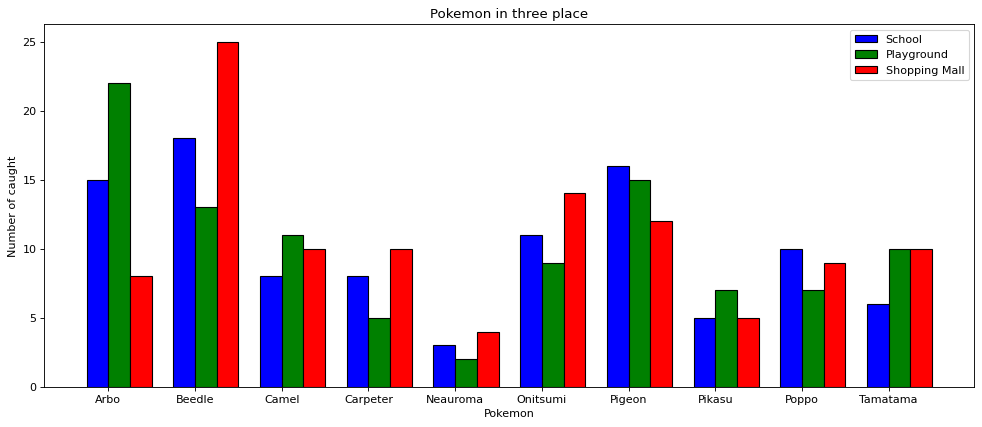

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
with conn:
  cursor = conn.execute("SELECT kind as Pokemon,school as School,playground as Playground,shopping_mall as `Shopping Mall` from find_pokemon ORDER BY kind")
  sc = conn.execute("SELECT school as School FROM find_pokemon ORDER BY kind")
  pl = conn.execute("SELECT playground as Playground FROM find_pokemon ORDER BY kind")
  sh = conn.execute("SELECT shopping_mall as `Shopping Mall` FROM find_pokemon ORDER BY kind")


record = cursor.fetchall()
school = sc.fetchall()
play = pl.fetchall()
shop = sh.fetchall()

name = []
school_ = []
play_ = []
shop_ = []
for i in range(len(record)):
  name.append(record[i][0])
  school_.extend(list(school[i]))
  play_.extend(list(play[i]))
  shop_.extend(list(shop[i]))


n = len(name)
r = np.arange(n)
width = 0.25
figure(figsize=(15, 6), dpi=80)
plt.bar(r,school_, color = 'b', width = width,edgecolor = 'black',label = 'School')
plt.bar(r+width,play_, color = 'g', width = width,edgecolor = 'black',label = 'Playground')
plt.bar(r+width+width,shop_, color = 'r', width = width,edgecolor = 'black',label = 'Shopping Mall')

plt.xlabel("Pokemon")
plt.ylabel("Number of caught")
plt.title("Pokemon in three place")

plt.xticks(r + width/2,name)
plt.legend()

plt.show()


# o)

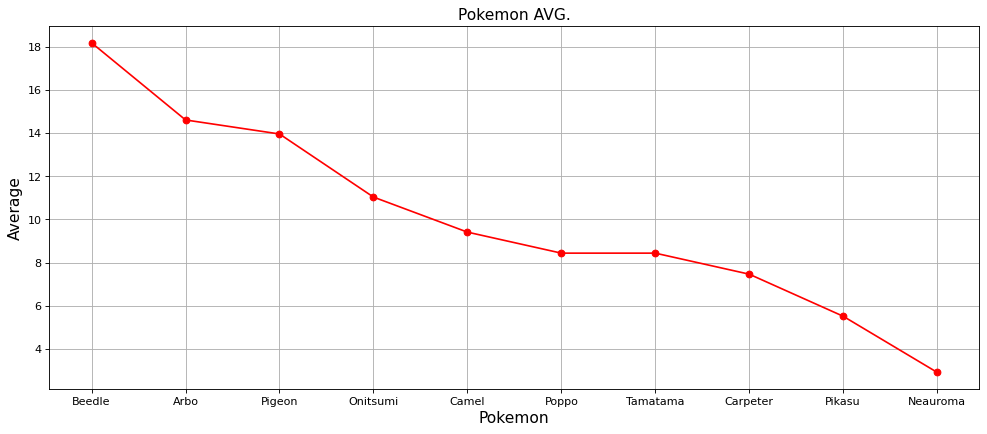

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

with conn:
  conn.execute('''CREATE VIEW IF NOT EXISTS POKEMON_SUM AS
                 SELECT kind,school+playground+shopping_mall as sum_pokemon FROM find_pokemon''')
with conn:
  cursor = conn.execute("SELECT kind,((school+playground+shopping_mall+0.0)*100.0)/(SELECT SUM(sum_pokemon) FROM POKEMON_SUM)+0.0 as AVG FROM find_pokemon ORDER BY AVG desc")
record = cursor.fetchall()
name = []
avg = []
for i in range(len(record)):
  name.append(record[i][0])
  avg.append(record[i][1])

figure(figsize=(15, 6), dpi=80)
plt.plot(name,avg,color="red", marker='o')
plt.title('Pokemon AVG.', fontsize=14)
plt.xlabel('Pokemon', fontsize=14)
plt.ylabel('Average', fontsize=14)
plt.grid(True)
plt.show()
